# Example using NeMo Retriever Parse Plugin

First, download a Dataset of pdf images:

In [1]:
import fiftyone as fo
import fiftyone.utils.huggingface as fouh


dataset = fouh.load_from_hub(
    "harpreetsahota/CVPR_2024_Papers_with_Embeddings",
    name="cvpr_papers",
    max_samples=3,
    overwrite=True
    )

Loading dataset
Importing samples...
 100% |█████████████████████| 3/3 [2.4ms elapsed, 0s remaining, 1.3K samples/s]      
Migrating dataset 'cvpr_papers' to v1.3.1


Then download the plugin:

In [2]:
!fiftyone plugins download https://github.com/harpreetsahota204/nemo_retriever_parse_plugin

  123.7Kb [48.7ms elapsed, ? remaining, 2.5Mb/s] 
Copying plugin '@harpreetsahota/nemo_retriever_parse' to '/home/harpreet/fiftyone/__plugins__/@harpreetsahota/nemo_retriever_parse'


Make sure you have the requirements downloaded (in this case it's just `fiftyone` and `tqdm`):

In [ ]:
!fiftyone plugins requirements @harpreetsahota/nemo_retriever_parse --install

You'll need an NVIDIA API Key for this plugin. You can get one by following [this link](https://nvda.ws/3LspiUP). Then set it to the environment variable `NVIDIA_API_KEY`.

Alternatively, you can directly pass your NVIDIA API Key:

In [3]:
from getpass import getpass

NVIDIA_API_KEY = getpass("Enter your NVIDIA API key: ")

Then you'll need to instantiate the operator:

In [4]:
import fiftyone.operators as foo

nemo_parser = foo.get_operator("@harpreetsahota/nemo_retriever_parse/run_nemo_retriever_parse")

Python version is above 3.10, patching the collections module.


/home/harpreet/miniconda3/envs/fiftyone/lib/python3.11/site-packages/transformers/models/auto/image_processing_auto.py:602: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


When running in a notebook you follow these steps:

1. Ensure that you have set the environment variable `os.environ['FIFTYONE_ALLOW_LEGACY_ORCHESTRATORS'] = 'true'` (or set in the same terminal enviornment where you launch the app from)

2. Kick off a Delegated Service by opening your terminal and executing `fiftyone delegated launch`

3. Use the `await` syntax and pass `delegate=True` into your operator calls, as shown below:

In [5]:
import os

os.environ['FIFTYONE_ALLOW_LEGACY_ORCHESTRATORS'] = 'true'

await nemo_parser(
    dataset, #whatever your dataset is
    api_key=NVIDIA_API_KEY,
    delegate=True
    )

You can view your results in the App:


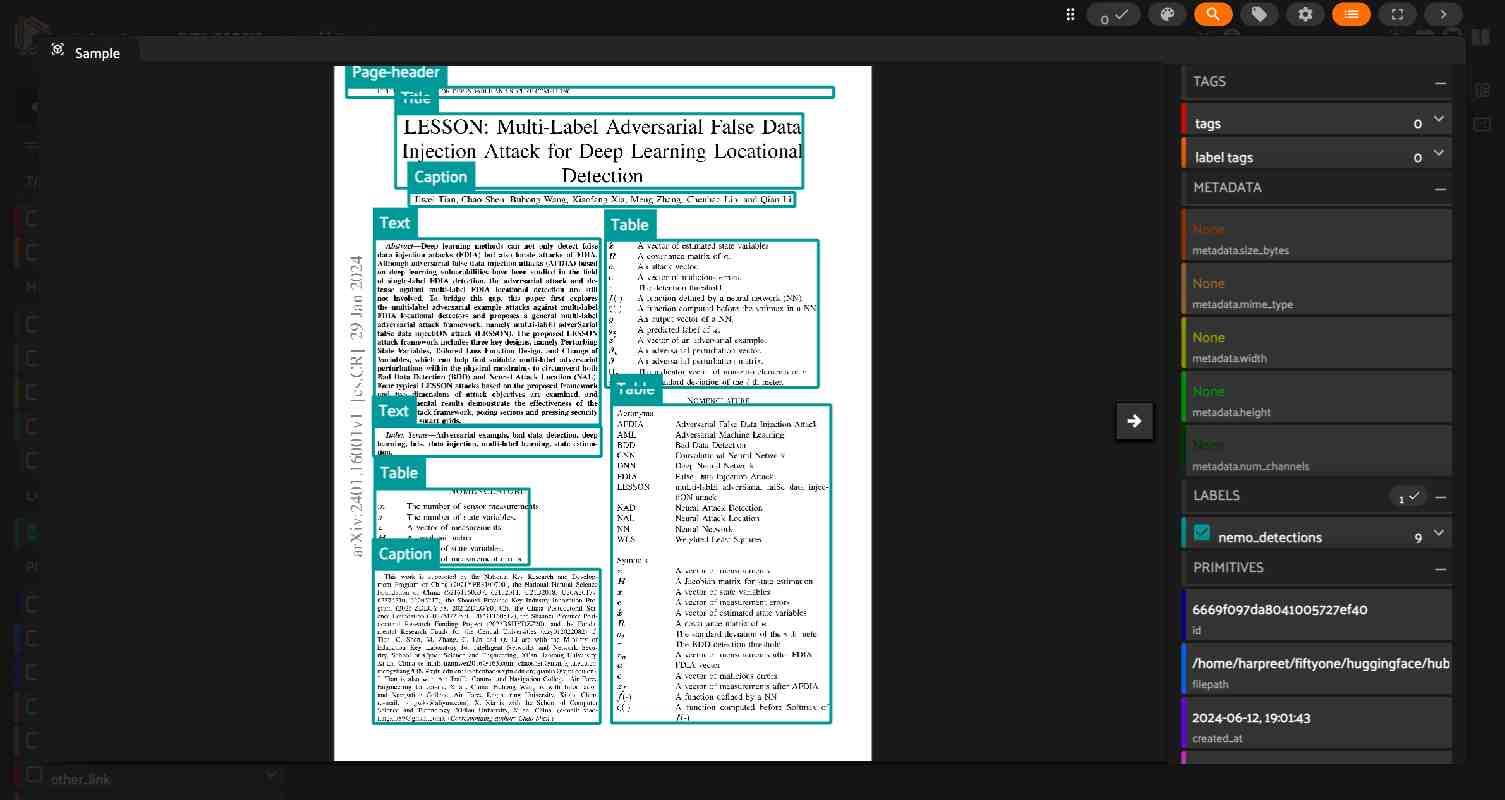

In [6]:
session = fo.launch_app(dataset)

In [7]:
session.freeze()